In [1]:
%cd ..

/workspace/TabDDPM_copy/TabDDPM


/venv/main/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
sigmas_list_ ={}
for sigma in [0, 0.001, 0.01, 0.1, 0.25, 0.5]:
    sigmas_list_[f'Константа\nsigma={sigma}'] =  np.ones(100000) * sigma

In [10]:
sigmas_list = []

# 1/3 х 0.5 + 1/3 х 0.1 + 1/3 х 0.01
len_0_5 = 100000 // 3
len_0_1 = 100000 // 3
len_0_01 = 100000  - len_0_5 - len_0_1

sigmas_list.append(np.concatenate([np.ones(len_0_5)  * 0.5, 
                    np.ones(len_0_1)  * 0.1,
                    np.ones(len_0_01)  * 0.01
                   ]))

# 1/3 х 0.5 + 1/3 х 0.1 + 1/3 х 0.01
len_0_5 = 100000 // 3
len_0_1 = 100000 // 3
len_0_01 = 100000  - len_0_5 - len_0_1

sigmas_list.append(np.concatenate([np.ones(len_0_5)  * 0.5, 
                    np.ones(len_0_1)  * 0.1,
                    np.ones(len_0_01)  * 0.01
                   ]))
# 1/6 x 0.5 + 1/6 x 0.25 + 0.1 x 1/3 + 0.01 x 1/3
len_0_5 = 100000 // 6
len_0_25 = 100000 // 6
len_0_1 = 100000 // 3
len_0_01 = 100000  - len_0_5 -len_0_25 - len_0_1

sigmas_list.append(np.concatenate([np.ones(len_0_5)  * 0.5, 
                    np.ones(len_0_25)  * 0.25,
                    np.ones(len_0_1)  * 0.1,
                    np.ones(len_0_01)  * 0.01
                   ]))

# 1/8 x 0.5 + 1/8 x 0.25 + 0.1 x 1/4 + 0.01 x 1/2
len_0_5 = 100000 // 8
len_0_25 = 100000 // 8
len_0_1 = 100000 // 4
len_0_01 = 100000  - len_0_5 -len_0_25 - len_0_1

sigmas_list.append(np.concatenate([np.ones(len_0_5)  * 0.5, 
                    np.ones(len_0_25)  * 0.25,
                    np.ones(len_0_1)  * 0.1,
                    np.ones(len_0_01)  * 0.01
                   ]))

# 1/3 х 0.1 + 1/3 х 0.01 + 1/3 х 0.001
len_0_5 = 100000 // 3
len_0_1 = 100000 // 3
len_0_01 = 100000  - len_0_5 - len_0_1

sigmas_list.append(np.concatenate([np.ones(len_0_5)  * 0.1, 
                    np.ones(len_0_1)  * 0.01,
                    np.ones(len_0_01)  * 0.001
                   ]))

# linear from 0.5 to 0.01
sigmas_list.append(np.linspace(0.5, 0.01, 100000))

# linear from 0.25 to 0.01
sigmas_list.append(np.linspace(0.25, 0.01, 100000))

# cosine from 0.5 to 0
sigmas_list.append((np.cos(np.linspace(0, np.pi, 100000)) + 1) * 0.5 / 2)

# cosine from 0.25 to 0
sigmas_list.append((np.cos(np.linspace(0, np.pi, 100000)) + 1) * 0.25 / 2)

# cosine from 0.1 to 0
sigmas_list.append((np.cos(np.linspace(0, np.pi, 100000)) + 1) * 0.25 / 2)

In [11]:
for i in range(len(sigmas_list)):
    if i < 5:
        sigmas_list_[f'Шаги {i}'] =  sigmas_list[i]
    elif i < 7:
        sigmas_list_[f'Линейная {i}'] =  sigmas_list[i]
    elif i < 10:
        sigmas_list_[f'Косинус {i}'] =  sigmas_list[i]

In [12]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
    
cmap = get_cmap(len(sigmas_list_))

/tmp/ipykernel_47072/2255493863.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  return plt.cm.get_cmap(name, n)


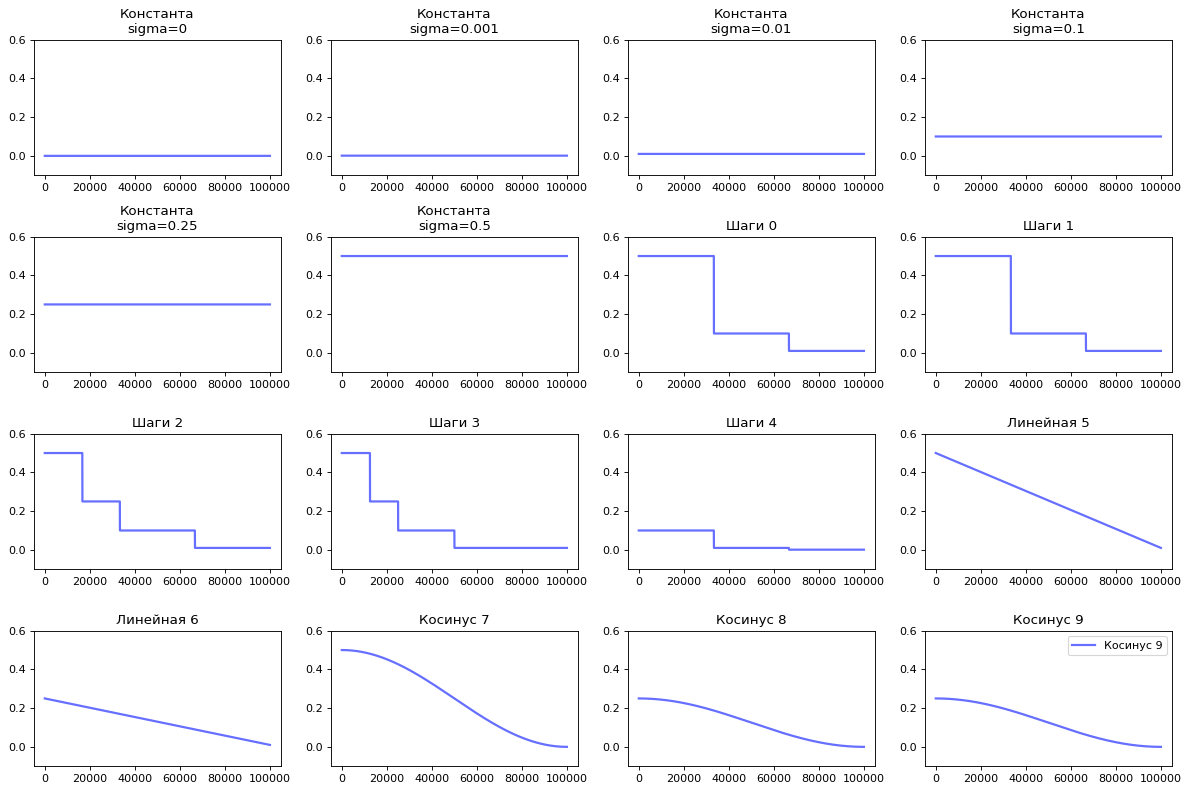

In [20]:
fig = plt.figure(figsize=(15, 10), dpi=80)

for i, name in enumerate(sigmas_list_.keys()):
    ax = fig.add_subplot(4, 4, i+1)
    ax.plot(range(100000), sigmas_list_[name], color=cmap(10), label=name, alpha=0.6, linewidth=2)
    ax.set_title(name)
    ax.set_ylim(-0.1, 0.6)
    
plt.legend()
# plt.title(f"Sigma schedule\nnoise ~ N(0, sigma)")
fig.tight_layout()

plt.show()